In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score

from utilities import visualize_classifier

In [2]:
data = np.loadtxt('data_multivar_nb.txt', delimiter=',')
x, y = data[:,:-1], data[:,-1] #pisahkan independent fitur dan dependent

In [3]:
classifier = GaussianNB()

In [4]:
classifier.fit(x,y)

GaussianNB()

In [5]:
y_pred = classifier.predict(x)

In [6]:
#hitung akurasi
akurasi = 100 * (y == y_pred).sum()/x.shape[0]
print("akurasi = {}".format(round(akurasi, 2)))

akurasi = 99.75


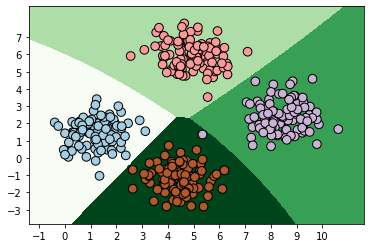

In [7]:
visualize_classifier(classifier, x, y)

In [8]:
#lakukan cross validation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)
classifier_new = GaussianNB()
classifier_new.fit(x_train, y_train)
y_test_pred = classifier_new.predict(x_test)

In [9]:
#hitung akurasi cross validation
akurasi_cross = 100 * (y_test == y_test_pred).sum()/x_test.shape[0]
print("akurasi = {}".format(round(akurasi_cross, 2)))

akurasi = 100.0


In [10]:
# akurasi 3 fold cross validation
accuracy = cross_val_score(classifier, x, y, scoring='accuracy', cv=3)
print('Accuracy: {}'.format(accuracy.mean()*100))

precision = cross_val_score(classifier, x, y, scoring='precision_weighted', cv=3)
print('Precision: {}'.format(precision.mean()*100))

recall = cross_val_score(classifier, x, y, scoring='recall_weighted', cv=3)
print('Recall: {}'.format(recall.mean()*100))

f1 = cross_val_score(classifier, x, y, scoring='f1_weighted', cv=3)
print('f1: {}'.format(f1.mean()*100))

Accuracy: 99.75124378109453
Precision: 99.75835110163467
Recall: 99.75124378109453
f1: 99.75113285301475
